In [54]:
import numpy as np
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline 

# tau range between [0.1-1], the smaller the closer to softmax
# self.tau = 0.3 
def gumbelSoftmax(x):        
    gumbelNoiseArray = -torch.log(-torch.log((torch.rand_like(x)+0.001) / 1.002))        
    softmaxOutput = (F.softmax(x,1)+0.001) / 1.002        
    noisySoftmaxOutput = (torch.log(softmaxOutput)+gumbelNoiseArray) / 0.1
#     return F.softmax(noisySoftmaxOutput, 1)
    return F.sigmoid(noisySoftmaxOutput)

In [111]:
x = torch.rand(10, 1)
y = gumbelSoftmax(x)


/home/ubuntu/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [112]:
y

tensor([[2.6247e-01],
        [6.5378e-05],
        [9.9968e-01],
        [7.1031e-01],
        [9.9999e-01],
        [1.8991e-01],
        [1.0000e+00],
        [1.0000e+00],
        [1.0000e+00],
        [1.0000e+00]])

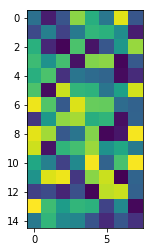

In [75]:
x = torch.rand(1, 120)
x_ = x.reshape(1, 15, -1)
plt.imshow(np.asarray(x_[0].tolist()))

/home/ubuntu/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


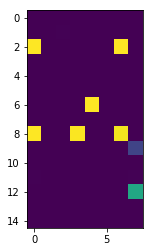

In [76]:
y = gumbelSoftmax(x_)
plt.imshow(np.asarray(y.tolist()[0]))